In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm 

In [5]:
df_=pd.read_stata('../HRS-HCAP-Classification/HCAPHRS.dta')
df_=df_.set_index('HHID')
df_

,PN,SECU,STRATUM,PWGTR,HCAP16WGTR,PINSAMP,PIWWAVE,PIWYEAR,PMARST,PNURSHM,...,x3x4,x3x5,x3x6,x3x7,x4x5,x4x6,x4x7,x5x6,x5x7,x6x7
HHID,,,,,,,,,,,,,,,,,,,,,
010001,010,2.0,1.0,7558.0,NaN,1.0,1.0,2016.0,4.0,5.0,...,0.0,0.0,0.0,0.000000,-0.056281,-0.045795,0.0,0.0,0.0,0.0
010003,030,2.0,1.0,6900.0,NaN,1.0,1.0,2016.0,3.0,5.0,...,0.0,0.0,0.0,0.000000,-0.056281,-0.045795,4.0,0.0,0.0,0.0
010004,040,2.0,1.0,5836.0,17148.0,1.0,1.0,2016.0,3.0,5.0,...,0.0,0.0,0.0,0.000000,-0.056281,-0.045795,0.0,0.0,0.0,0.0
010013,040,2.0,1.0,5768.0,NaN,1.0,1.0,2016.0,2.0,5.0,...,0.0,0.0,0.0,0.000000,-0.056281,-0.045795,1.0,0.0,0.0,0.0
010038,010,2.0,2.0,6573.0,16431.0,1.0,1.0,2016.0,1.0,5.0,...,0.0,0.0,0.0,0.006944,-0.056281,-0.045795,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
923525,010,1.0,51.0,1214.0,NaN,1.0,1.0,2016.0,1.0,5.0,...,0.0,0.0,0.0,0.000000,0.943719,-0.045795,2.0,0.0,2.0,0.0
923525,020,1.0,51.0,1477.0,NaN,1.0,1.0,2017.0,1.0,5.0,...,0.0,0.0,0.0,0.000000,-0.056281,-0.045795,0.0,0.0,0.0,0.0
952836,010,2.0,12.0,1041.0,NaN,1.0,1.0,2016.0,2.0,5.0,...,0.0,0.0,0.0,-0.000000,-0.056281,0.954205,-6.0,0.0,-0.0,-6.0


In [6]:
df_.columns

Index(['PN', 'SECU', 'STRATUM', 'PWGTR', 'HCAP16WGTR', 'PINSAMP', 'PIWWAVE',
       'PIWYEAR', 'PMARST', 'PNURSHM', 'PPROXY', 'rage', 'PA019', 'PAGE',
       'female', 'black', 'hisp', 'SCHLYRS', 'HISPANIC', 'RACE', 'vdori',
       'vdlfl1z', 'vdlfl2', 'vdlfl3', 'vdwdimmz', 'vdwddelz', 'vdexf7z',
       'vdsevens', 'vdcount', 'nPG014', 'nPG021', 'nPG023', 'nPG030', 'nPG040',
       'nPG041', 'nPG044', 'nPG047', 'nPG050', 'nPG059', 'PD102', 'jorm',
       'vs1hcapdx', 'vs1hcapdxeap', 'nonzeroweight', 'inHCAP', 'age65up',
       'cogfunction2016', 'PrDem', 'PrCIND', 'PrNorm', 'Cog', 'CogSd',
       'Hudomiet_classification', 'SCHLYRSimp', 'DEGREE', 'spage1', 'spage2',
       'spage3', 'rage_cat', 'Sex', 'RaceAndEthnicity',
       'Educational_Attainment', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7',
       'x1x4', 'x1x5', 'x1x6', 'x1x7', 'x2x4', 'x2x5', 'x2x6', 'x2x7', 'x3x4',
       'x3x5', 'x3x6', 'x3x7', 'x4x5', 'x4x6', 'x4x7', 'x5x6', 'x5x7', 'x6x7'],
      dtype='object')

In [7]:
cols_ignore=['SECU', 'PN','STRATUM','PINSAMP', 'HCAP16WGTR','PIWWAVE',
             'PIWYEAR','PPROXY','rage','PA019','PAGE','x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7',
       'x1x4', 'x1x5', 'x1x6', 'x1x7', 'x2x4', 'x2x5', 'x2x6', 'x2x7', 'x3x4',
       'x3x5', 'x3x6', 'x3x7', 'x4x5', 'x4x6', 'x4x7', 'x5x6', 'x5x7', 'x6x7','SCHLYRSimp',
          'spage1', 'spage2','spage3' ]

In [8]:
df_=df_[[x for x in df_.columns if x not in cols_ignore]]

In [9]:
df_.columns

Index(['PWGTR', 'PMARST', 'PNURSHM', 'female', 'black', 'hisp', 'SCHLYRS',
       'HISPANIC', 'RACE', 'vdori', 'vdlfl1z', 'vdlfl2', 'vdlfl3', 'vdwdimmz',
       'vdwddelz', 'vdexf7z', 'vdsevens', 'vdcount', 'nPG014', 'nPG021',
       'nPG023', 'nPG030', 'nPG040', 'nPG041', 'nPG044', 'nPG047', 'nPG050',
       'nPG059', 'PD102', 'jorm', 'vs1hcapdx', 'vs1hcapdxeap', 'nonzeroweight',
       'inHCAP', 'age65up', 'cogfunction2016', 'PrDem', 'PrCIND', 'PrNorm',
       'Cog', 'CogSd', 'Hudomiet_classification', 'DEGREE', 'rage_cat', 'Sex',
       'RaceAndEthnicity', 'Educational_Attainment'],
      dtype='object')

In [11]:
df_['bineduc']=df_['Educational_Attainment'].isin(['Education beyond college','Some college'])+0
df_=df_.drop('Educational_Attainment',axis=1)

/tmp/ipykernel_469624/2680784714.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_['bineduc']=df_['Educational_Attainment'].isin(['Education beyond college','Some college'])+0


In [13]:
df=df_.copy()
N=26
# Step 1: Select columns with > N unique entries
cols_to_process = [col for col in df.columns if df[col].nunique() > N]

# Step 2: Round/cluster each selected column to N closest values
for col in cols_to_process:
    unique_vals = np.linspace(df[col].min(), df[col].max(), N)  # N evenly spaced values
    df[col] = df[col].apply(lambda x: unique_vals[np.argmin(np.abs(unique_vals - x))])
df

,PWGTR,PMARST,PNURSHM,female,black,hisp,SCHLYRS,HISPANIC,RACE,vdori,...,PrCIND,PrNorm,Cog,CogSd,Hudomiet_classification,DEGREE,rage_cat,Sex,RaceAndEthnicity,bineduc
HHID,,,,,,,,,,,,,,,,,,,,,
010001,7797.12,4.0,5.0,0.0,0.0,0.0,12.0,5.0,1.0,4.0,...,0.000000,1.00,1.867870,0.382113,Normal,2.0,75-79,Male,White,0
010003,7797.12,3.0,5.0,1.0,0.0,0.0,16.0,5.0,1.0,NaN,...,0.000000,0.00,-3.824488,0.250356,NaN,5.0,NaN,Female,White,1
010004,5847.84,3.0,5.0,1.0,0.0,0.0,12.0,5.0,1.0,4.0,...,0.000000,1.00,2.167467,0.368938,Normal,2.0,70-74,Female,White,0
010013,5847.84,2.0,5.0,1.0,0.0,0.0,13.0,5.0,1.0,4.0,...,0.000000,1.00,1.867870,0.408465,Normal,2.0,65-69,Female,White,1
010038,5847.84,1.0,5.0,0.0,0.0,0.0,16.0,5.0,1.0,3.0,...,0.000000,1.00,1.867870,0.368938,Normal,4.0,75-79,Male,White,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
923525,1949.28,1.0,5.0,1.0,1.0,0.0,14.0,5.0,2.0,NaN,...,0.000000,0.00,-3.824488,0.250356,NaN,2.0,NaN,Female,Black or African-American (Not Hispanic),1
923525,1949.28,1.0,5.0,0.0,1.0,0.0,12.0,5.0,2.0,NaN,...,0.000000,0.00,-3.824488,0.250356,NaN,1.0,NaN,Male,Black or African-American (Not Hispanic),0
952836,1949.28,2.0,5.0,1.0,0.0,1.0,6.0,2.0,1.0,NaN,...,0.000000,0.00,-3.824488,0.250356,NaN,0.0,NaN,Female,Hispanic (any racial group),0


In [14]:
df=df.astype(str).replace('nan','')

In [15]:
S=10000
df_training=df.sample(S)
training_index=df_training.index.values
df_test = df.drop(df_training.index)

In [16]:
X=df_training.values.astype(str)
feature_names=df_training.columns

In [17]:
from quasinet.qnet import load_qnet
from quasinet.qnet import save_qnet
from quasinet.qsampling import qsample
from quasinet.qnet import qdistance, qdistance_matrix
from quasinet.qnet import Qnet

In [18]:
%%time
model=Qnet(feature_names=feature_names,alpha=.15)
model.fit(X)
save_qnet(model,'modelbin',gz=True)

CPU times: user 1min 39s, sys: 9.53 s, total: 1min 48s
Wall time: 1min 49s


In [19]:
model.training_index=training_index
#save_qnet(model,'modelbin',gz=True)

In [214]:
OUTDIR='treesbin/'
modelpath='modelbin.gz'
model=load_qnet(modelpath,gz=True)
model.viz_trees(tree_path=OUTDIR,big_enough_threshold=1,format='png')

In [130]:
NULL=np.array(['']*len(feature_names)).astype('U100')

In [23]:
X_test=df_test.values.astype(str)

In [71]:
exposure_index=np.where(feature_names=='bineduc')[0][0]

In [72]:
def func(s):
    s1=s.copy()
    if s1[exposure_index]=='0':
        s1[exposure_index]='1'
    else:
        s1[exposure_index]='0'
    return s1
nb=np.ones(len(feature_names))
nb[exposure_index]=0
nb=nb/nb.sum()

In [377]:
df_test

,PWGTR,PMARST,PNURSHM,female,black,hisp,SCHLYRS,HISPANIC,RACE,vdori,...,PrCIND,PrNorm,Cog,CogSd,Hudomiet_classification,DEGREE,rage_cat,Sex,RaceAndEthnicity,bineduc
HHID,,,,,,,,,,,,,,,,,,,,,
010001,7797.12,4.0,5.0,0.0,0.0,0.0,12.0,5.0,1.0,4.0,...,0.0,1.0,1.867869558334351,0.382113379240036,Normal,2.0,75-79,Male,White,0
010003,7797.12,3.0,5.0,1.0,0.0,0.0,16.0,5.0,1.0,,...,0.0,0.0,-3.8244876861572266,0.250355988740921,,5.0,,Female,White,1
010013,5847.84,2.0,5.0,1.0,0.0,0.0,13.0,5.0,1.0,4.0,...,0.0,1.0,1.867869558334351,0.40846485733985904,Normal,2.0,65-69,Female,White,1
010050,5847.84,3.0,5.0,1.0,0.0,0.0,17.0,5.0,7.0,4.0,...,0.34309480905532835,0.68,1.2686740589141845,0.382113379240036,Normal,5.0,75-79,Female,All other racial groups,1
010063,1949.28,2.0,2.0,1.0,0.0,1.0,9.0,2.0,2.0,4.0,...,0.8005545544624328,0.16,0.6694785594940189,0.382113379240036,CIND,0.0,75-79,Female,Hispanic (any racial group),0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
920736,0.0,1.0,5.0,0.0,0.0,1.0,10.0,2.0,7.0,,...,0.0,0.0,-3.8244876861572266,0.250355988740921,,0.0,,Male,Hispanic (any racial group),0
920772,1949.28,2.0,5.0,0.0,1.0,0.0,13.0,5.0,2.0,,...,0.0,0.0,-3.8244876861572266,0.250355988740921,,2.0,,Male,Black or African-American (Not Hispanic),1
923333,1949.28,2.0,5.0,1.0,0.0,0.0,16.0,5.0,1.0,,...,0.0,0.0,-3.8244876861572266,0.250355988740921,,4.0,,Female,White,1


In [460]:
def getbp(s):
    # generate a vector summing to 1.0 with zeros where 
    # the response/observation is missing
    # so that we can perturb only in entries which are non-missing
    bp=np.ones(len(s))
    bp[np.where(s=='')[0]]=0
    return bp/bp.sum()

In [461]:
N=1000

steps=100

In [462]:
gensamples_bad=[qsample(s,model,steps=steps,alpha=-1,baseline_prob=getbp(s)) for s in tqdm(X_test[:N])]
ngennoswapq_bad=np.array([qdistance(NULL,s,model,model) for s in tqdm(gensamples_bad)])
gen_noswap_bad_df=pd.DataFrame(gensamples_bad,columns=feature_names)

100%|███████████████████████████████████████| 1000/1000 [00:28<00:00, 35.59it/s]


In [463]:
gensamples=[qsample(s,model,steps=steps,alpha=1.0,baseline_prob=getbp(s)) for s in tqdm(X_test[:N])]
ngennoswapq=np.array([qdistance(NULL,s,model,model) for s in tqdm(gensamples)])
gen_noswap_df=pd.DataFrame(gensamples,columns=feature_names)


100%|███████████████████████████████████████| 1000/1000 [00:28<00:00, 35.27it/s]


In [464]:
ngennoswap=np.array([qdistance(NULL,s,model,model) for s in tqdm(X_test[:N])])
gen_test_df = pd.DataFrame(X_test[:N],columns=feature_names)

100%|███████████████████████████████████████| 1000/1000 [00:29<00:00, 34.38it/s]


In [465]:
gensamples_swap=[qsample(func(s),model,steps=steps,baseline_prob=nb,alpha=1.1) for s in tqdm(X_test[:N])]
ngenswap=np.array([qdistance(NULL,s,model,model) for s in tqdm(gensamples_swap)])
gen_swap_df=pd.DataFrame(gensamples_swap,columns=feature_names)


100%|███████████████████████████████████████| 1000/1000 [00:28<00:00, 35.41it/s]


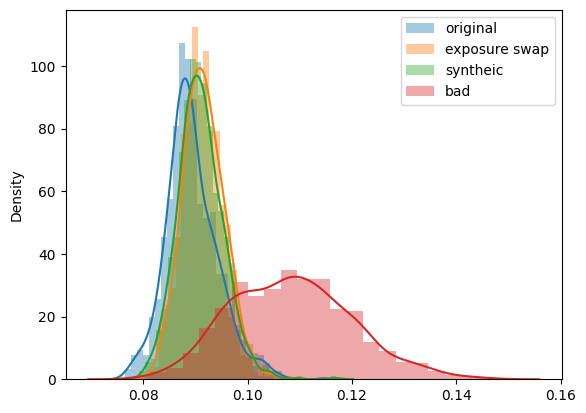

In [466]:
import seaborn as sns
import pylab as plt
sns.distplot(ngennoswap,label='original')
sns.distplot(ngenswap,label='exposure swap')
sns.distplot(ngennoswapq,label='syntheic')
sns.distplot(ngennoswapq_bad,label='bad')
plt.legend()

In [467]:
from scipy.stats import ks_2samp

alpha=1e-5
# KS two-sample test
stat, p_val = ks_2samp(ngennoswap,ngennoswapq)
print('comparing original and synthetic data')
print(f"KS Statistic: {stat:.4f}, p-value: {p_val:.4g}")

if p_val < alpha:
    print("Reject null hypothesis: distributions differ.")
else:
    print("Fail to reject null hypothesis: distributions are similar.")

comparing original and synthetic data
KS Statistic: 0.1960, p-value: 3.29e-17
Reject null hypothesis: distributions differ.


In [468]:
# KS two-sample test
stat, p_val = ks_2samp(ngenswap,ngennoswapq)
print('comparing exposure-swapped and synthetic data')
print(f"KS Statistic: {stat:.4f}, p-value: {p_val:.4g}")

if p_val < alpha:
    print("Reject null hypothesis: distributions differ.")
else:
    print("Fail to reject null hypothesis: distributions are similar.")

comparing exposure-swapped and synthetic data
KS Statistic: 0.0730, p-value: 0.009678
Fail to reject null hypothesis: distributions are similar.


In [469]:
stat, p_val = ks_2samp(ngennoswapq_bad,ngennoswapq)
print('comparing bad-synthetic and synthetic data')
print(f"KS Statistic: {stat:.4f}, p-value: {p_val:.4g}")

if p_val < alpha:
    print("Reject null hypothesis: distributions differ.")
else:
    print("Fail to reject null hypothesis: distributions are similar.")

comparing bad-synthetic and synthetic data
KS Statistic: 0.7580, p-value: 7.245e-282
Reject null hypothesis: distributions differ.
